We investigate the same run/s with all the tools at once.


In [4]:
import numpy as np
import qutip as qt
import math
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

from q_solve import generate_result
from q_solve import generate_result_envi_superpo
from Schmidt_solve import compute_schmidt_states_new
from Schmidt_solve import compute_schmidt_full
from Schmidt_solve import plot_schmidt_value_time
from VN import plot_VN
from VN import compute_VN_time
from e_spectrum import plot_e_spectrum
from Neff import plot_Neff_schmidt_Neff_tot
from checkup import checkup
from overlap import plot_p_overlap_graph
from similarities import probs_schmidt_in_energy_eigenstates
from similarities import cos_similarity_btw_s1_s2_plot
from similarities import metric_similarity_btw_s1_s2_plot
from similarities import time_cos_similarity_plot
from Interference import interference_plot
from make_gif import make_gif_distribs1s2_new


from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from PIL import Image







In [5]:

def all_at_once(d1=10,d2=200,E_spacing=1.0,Int_strength=0.03,tmax=10,ind_nb=100,w=0.3,env=[0]):
    
    #we start by generating the result
    if env==[0]:
        result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0) 
        #print("env = [0]")
    else:
        #print("env not [0]")
        result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result_envi_superpo(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0,env)
    #note: could make a lot more efficient by redefinig the functions to take things calculated before, to avoid doing the same thing multiple times
    eigenenergies_total, eigenstates_total = H_total.eigenstates()
    #=============make gifs
    #print("Giffing gif")
    make_gif_distribs1s2_new(Int_strength,w,result,eigenstates_total,eigenenergies_total,env,d1,d2,E_spacing,tmax,ind_nb)

    # Replace 'path_to_your_gif.gif' with the path to your GIF file

    gif_path = f'/Users/maringirard/Dev/Quantum_Branching/Gifs//distrib_schmidt1_2_over_energy_spectrum_EI_{Int_strength}_w_{w}_env_{env}_d1_{d1}_d2_{d2}_Espace_{E_spacing}_tmax_{tmax}_ind_nb_{ind_nb}.gif'

    # Create HTML code to display the GIF
    html_code = f'<img src="{gif_path}">'

    # Display the GIF
    display(HTML(html_code))
    
    #=============make spectrum
    #print("plotting plot")
    plot_e_spectrum(H_total,result,Int_strength)

    #=============make Neff
    #print("Neff")
    plot_Neff_schmidt_Neff_tot(H_total,result,tlist,Int_strength,False)

    #=============make schmidt value over time
    #print("schmidt val over time")
    plot_schmidt_value_time(result,tlist)
    
    #=============make VN
    #print("VN")
    plot_VN(result,tlist)

    #=============make overlap
    #print("overlap")
    plot_p_overlap_graph(tlist,result,H_total,w,Int_strength)

    #=============make interference
    #print("Interference")
    interference_plot(result,H_total,tlist,start_num=1000,end_num=1010)

    #=============make similarities
    #print("similarities")
    s1_list,s2_list=probs_schmidt_in_energy_eigenstates(result,eigenenergies_total,eigenstates_total,tlist,Int_strength,w)
    
    cos_similarity_btw_s1_s2_plot(s1_list,s2_list,tlist)
    
    metric_similarity_btw_s1_s2_plot(s1_list,s2_list,tlist)
    
    time_cos_similarity_plot(result,tlist)


    


[75, 150]


Neff_total is 27.623708197472137


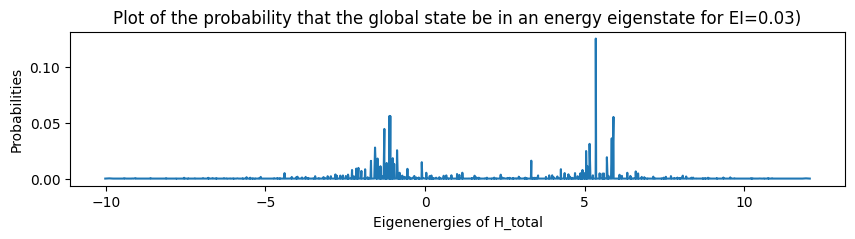

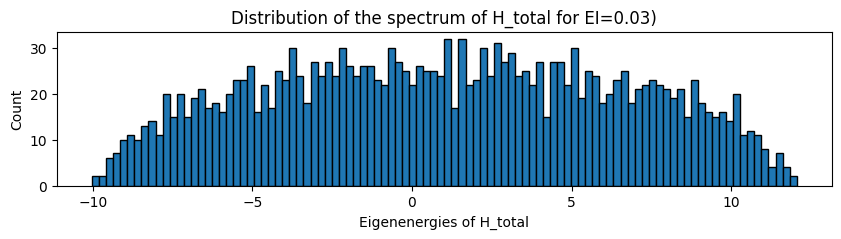

/Users/maringirard/Dev/Quantum_Branching/VN.py:8: RuntimeWarning: divide by zero encountered in log2
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/Users/maringirard/Dev/Quantum_Branching/VN.py:8: RuntimeWarning: invalid value encountered in multiply
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/Users/maringirard/Dev/Quantum_Branching/Quantum_Branching/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/maringirard/Dev/Quantum_Branching/Quantum_Branching/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010


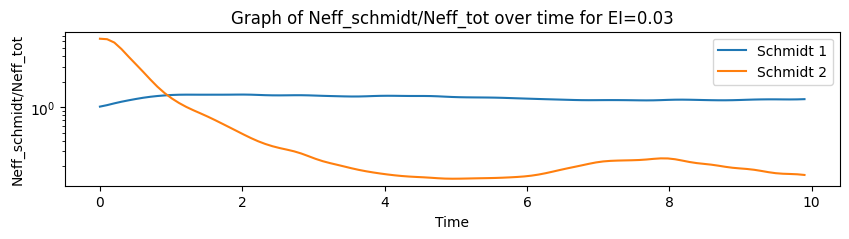

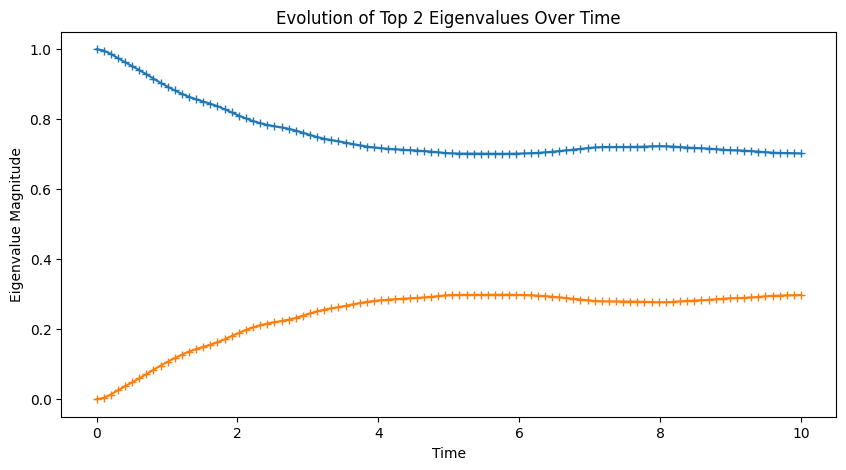

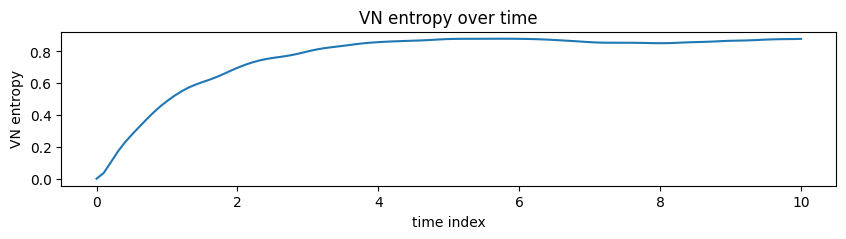

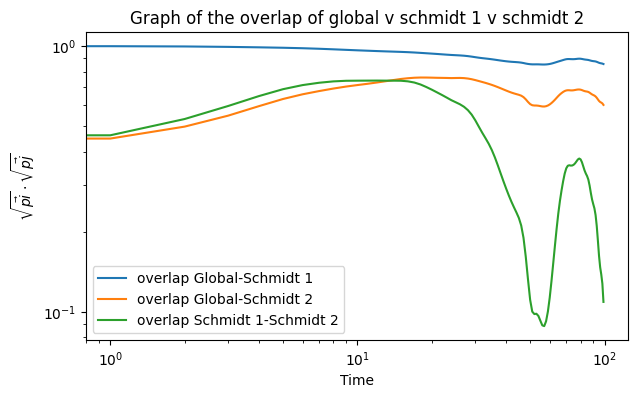

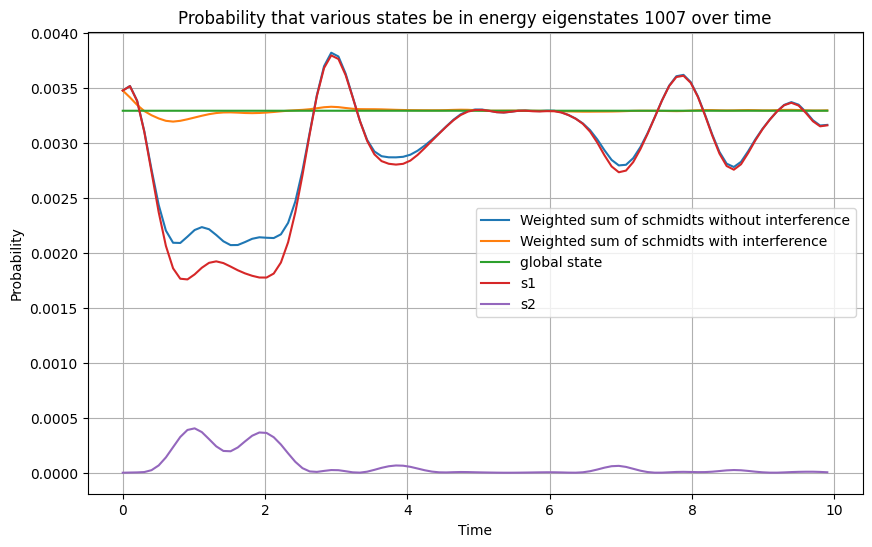

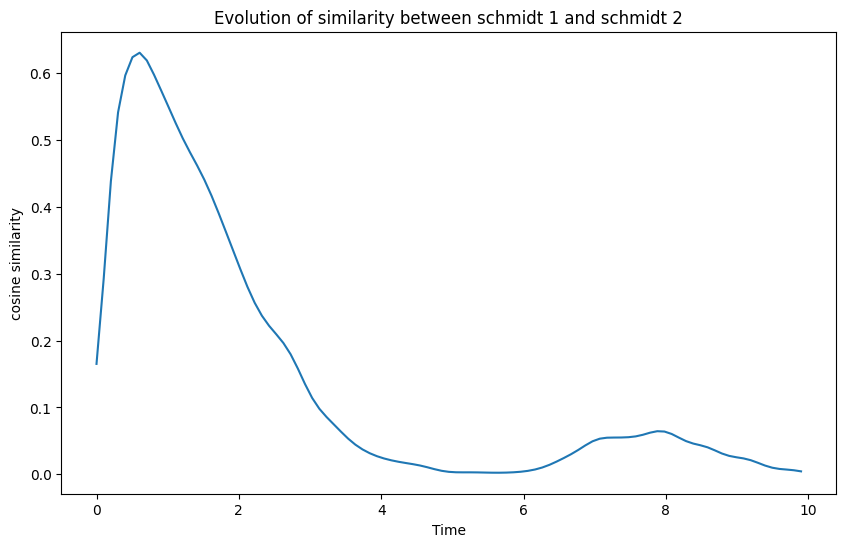

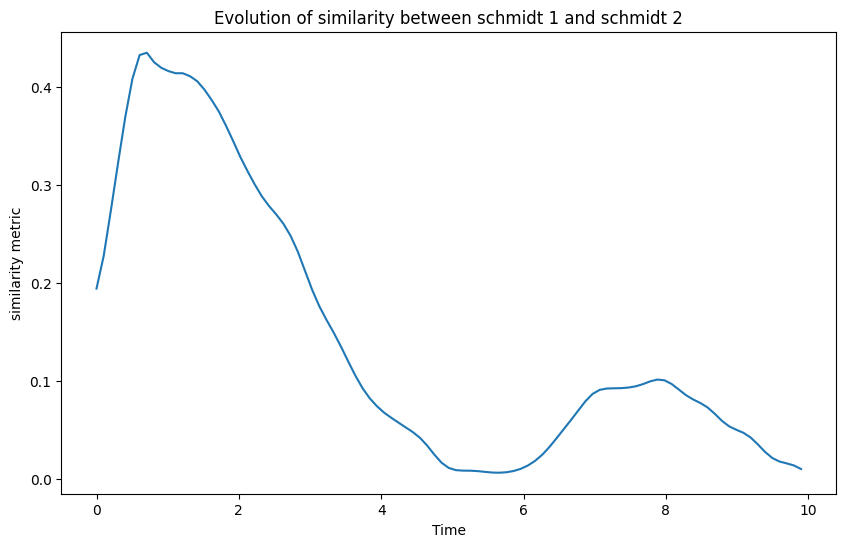

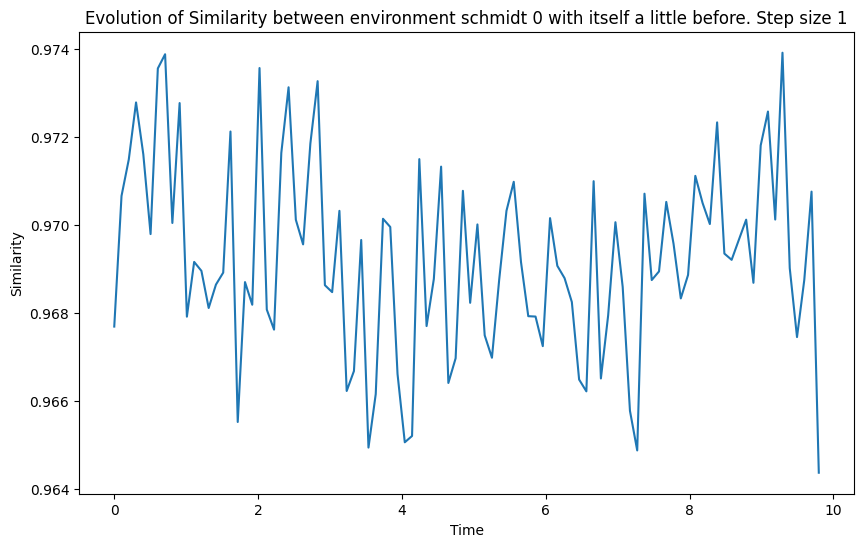

In [6]:
all_at_once(10,200,1.0,0.03,10,100,0.3,[75,150])

[0]


Neff_total is 18.474829162420797


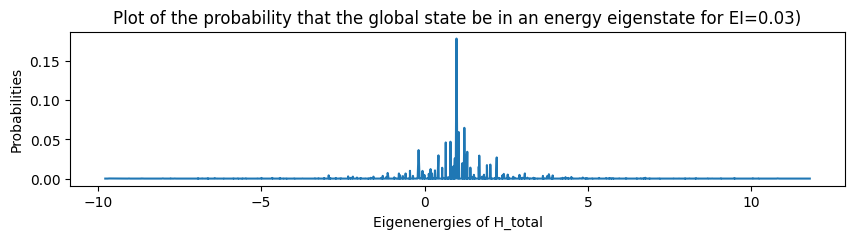

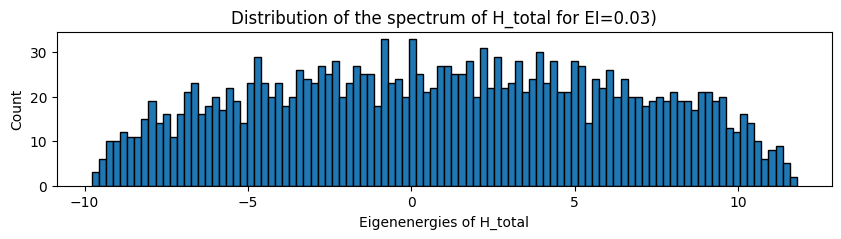

/Users/maringirard/Dev/Quantum_Branching/VN.py:8: RuntimeWarning: divide by zero encountered in log2
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/Users/maringirard/Dev/Quantum_Branching/VN.py:8: RuntimeWarning: invalid value encountered in multiply
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/Users/maringirard/Dev/Quantum_Branching/Quantum_Branching/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/maringirard/Dev/Quantum_Branching/Quantum_Branching/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010


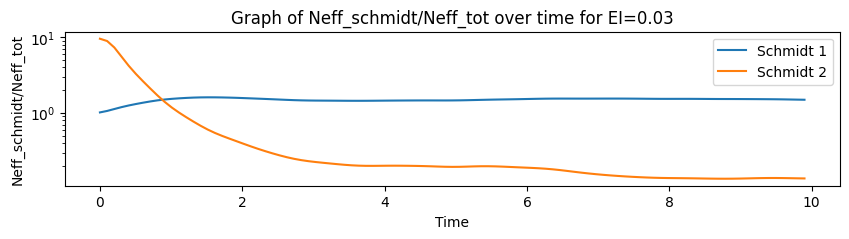

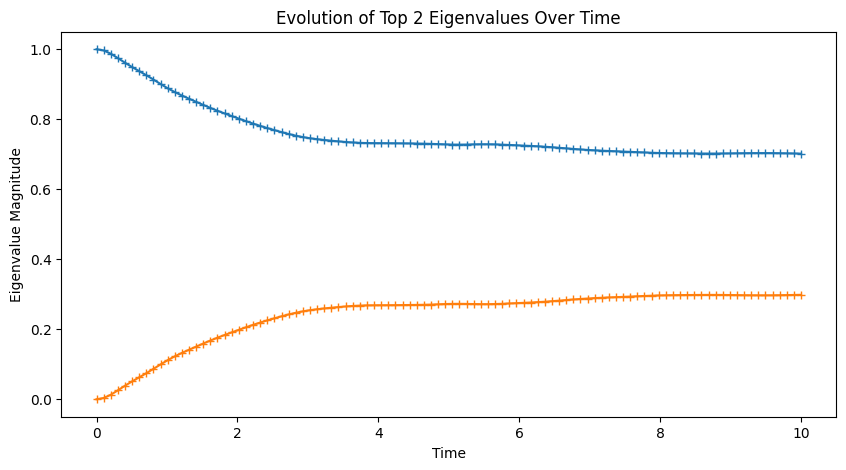

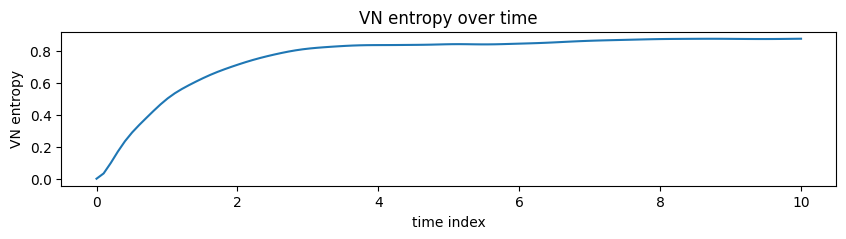

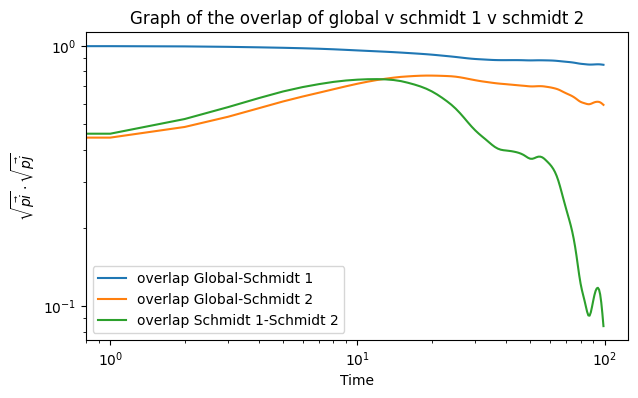

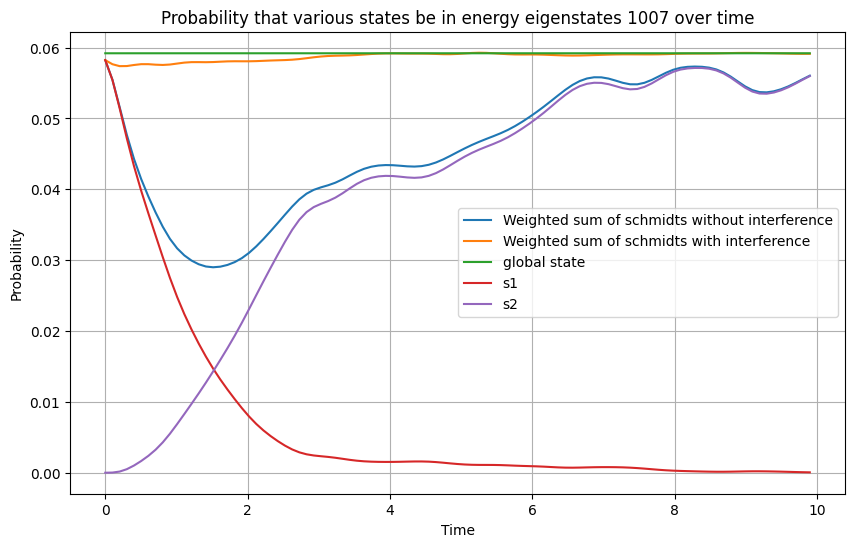

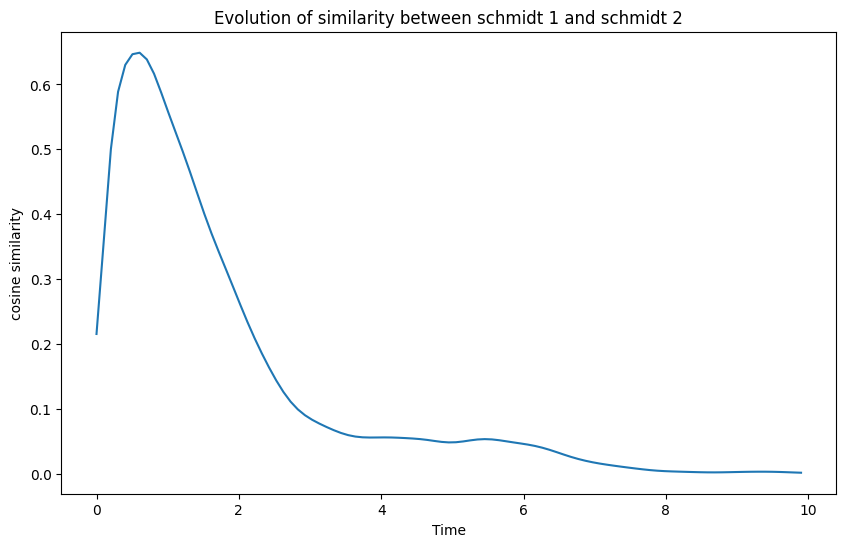

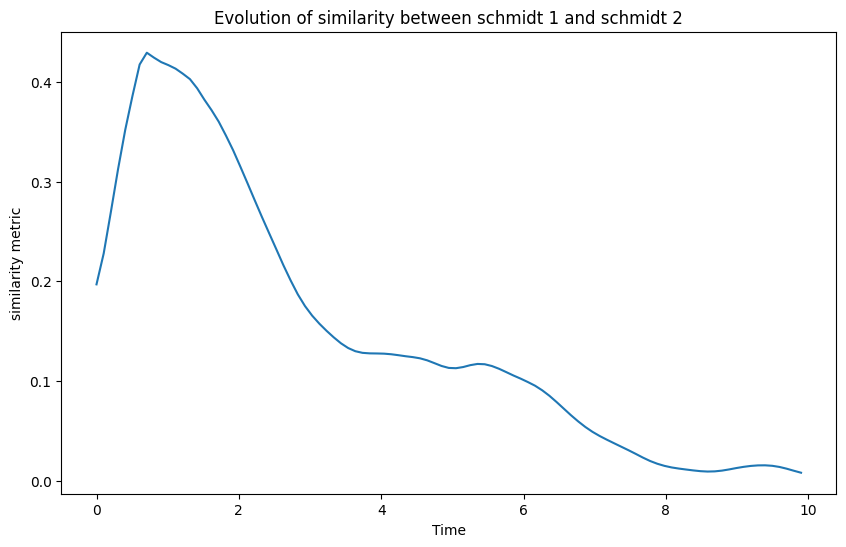

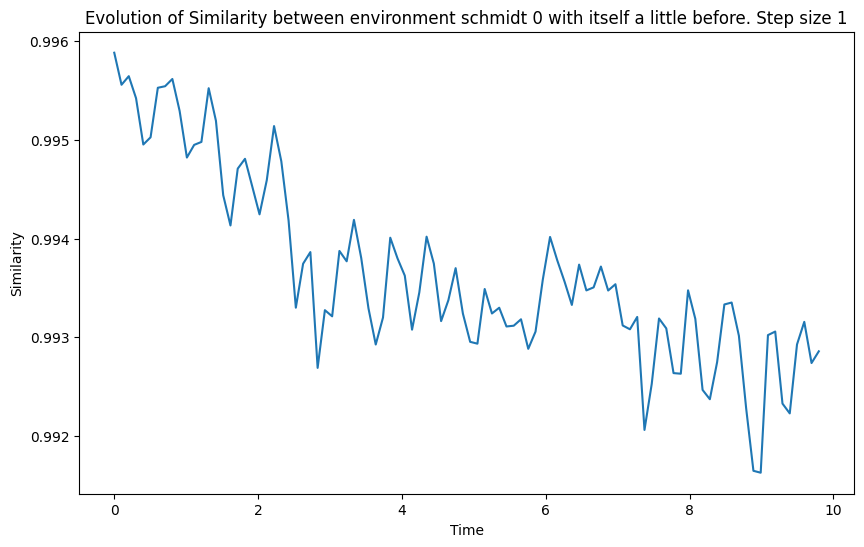

In [7]:
all_at_once(10,200,1.0,0.03,10,100,0.3)

#all_at_once(result,H_total,tlist,EI,w)

Note that the interference is maximal at ~2sec, which does not reall match up with other interesting points of other graphs. Maybe just the highest derivatives on the similarirty graphs

[0]


Neff_total is 13.390726847655428


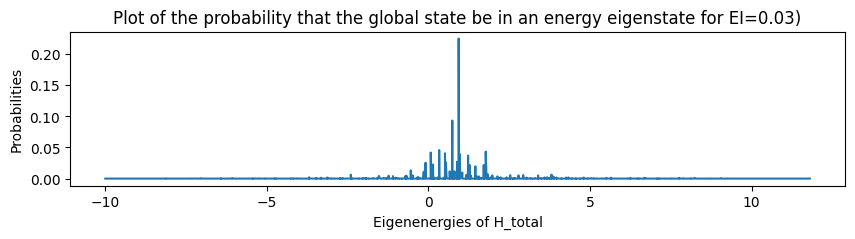

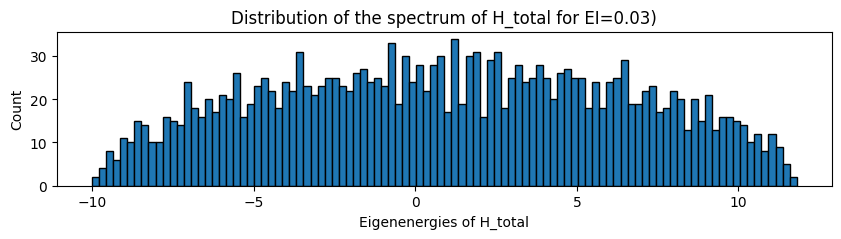

/Users/maringirard/Dev/Quantum_Branching/VN.py:8: RuntimeWarning: divide by zero encountered in log2
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/Users/maringirard/Dev/Quantum_Branching/VN.py:8: RuntimeWarning: invalid value encountered in multiply
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/Users/maringirard/Dev/Quantum_Branching/Quantum_Branching/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/maringirard/Dev/Quantum_Branching/Quantum_Branching/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010


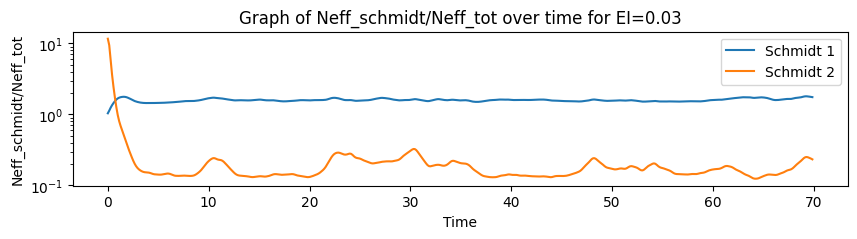

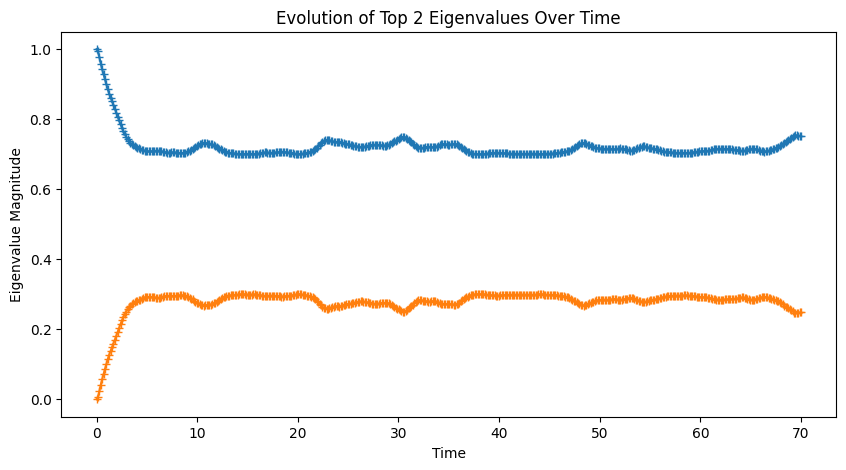

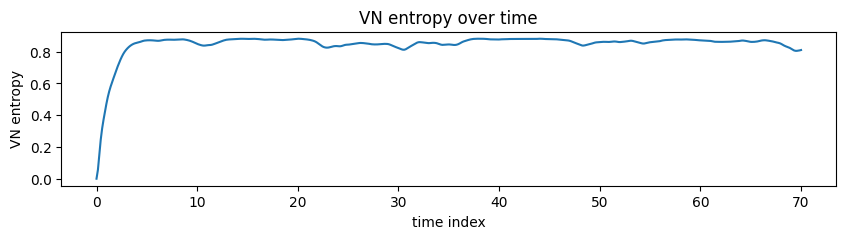

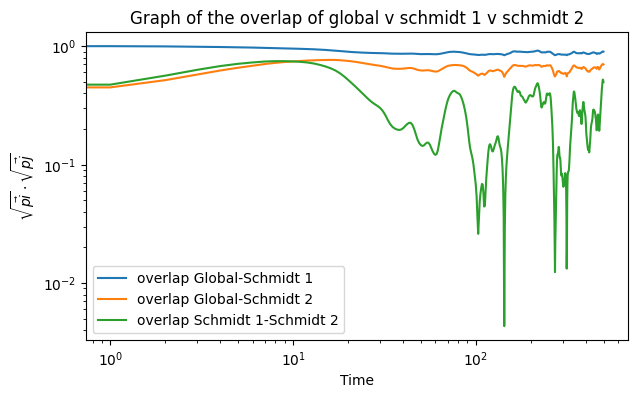

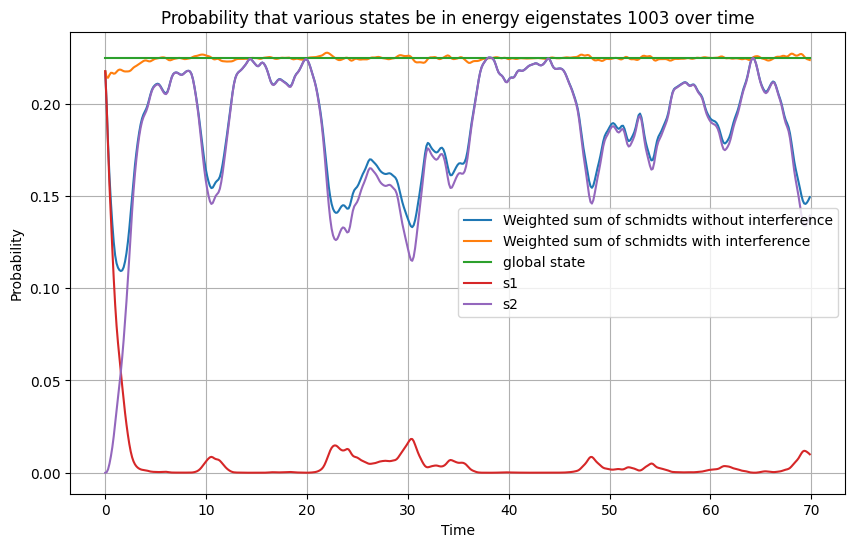

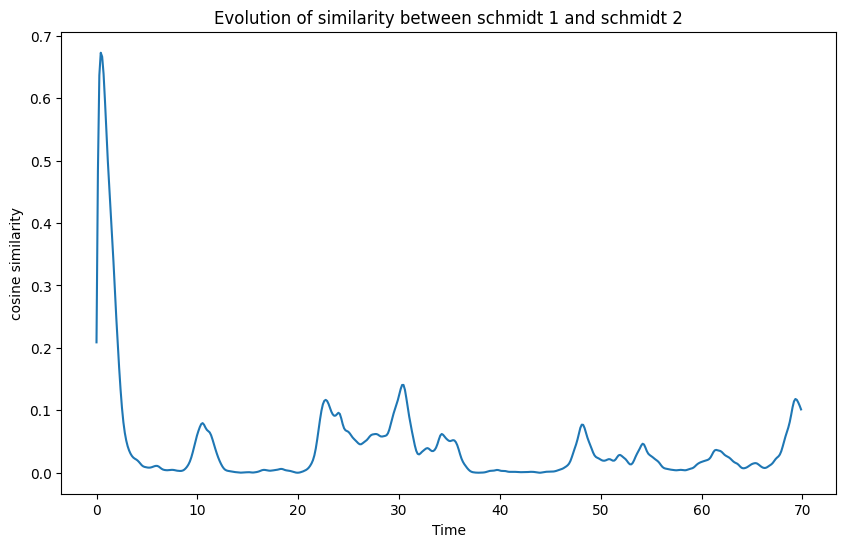

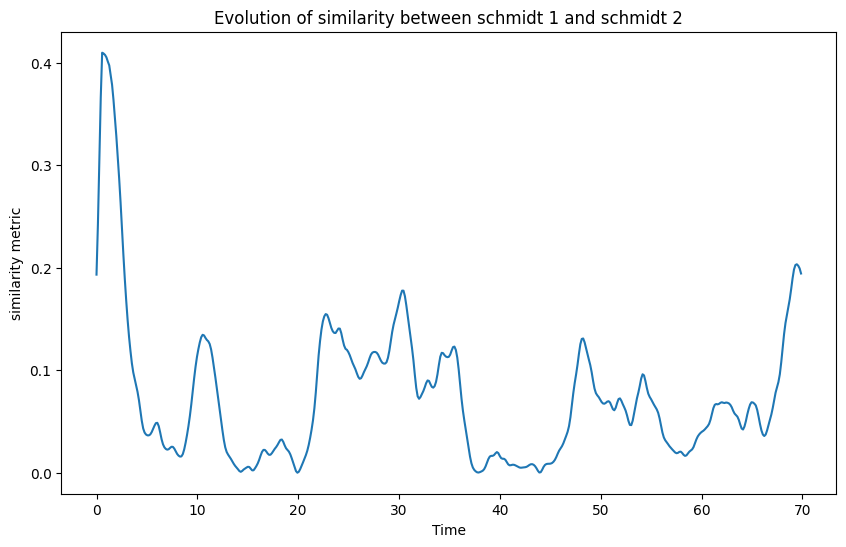

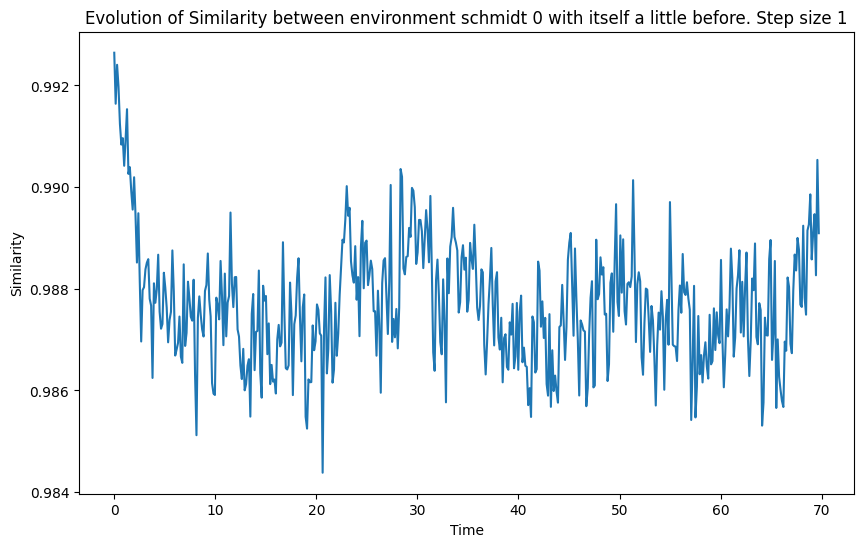

In [8]:
d1, d2 = 10, 200
E_spacing = 1.0
Int_strength = 0.03
EI=Int_strength
tmax= 70
ind_nb = 500
w=0.3
all_at_once(d1,d2,E_spacing, Int_strength,tmax,ind_nb,w)


We use this following set of graphs to explore the impact of starting the environment in a superposition of energy eigenstates. We will use the following parameters:

[75, 150]


Neff_total is 23.86122215731644


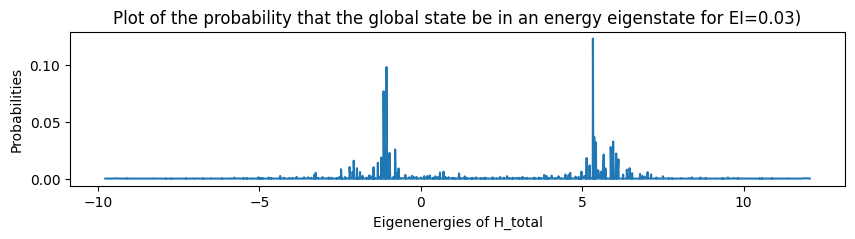

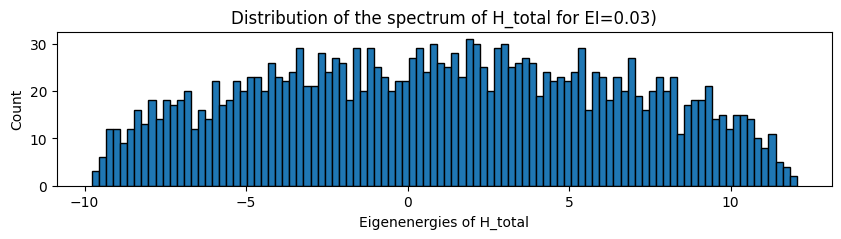

/Users/maringirard/Dev/Quantum_Branching/VN.py:8: RuntimeWarning: divide by zero encountered in log2
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/Users/maringirard/Dev/Quantum_Branching/VN.py:8: RuntimeWarning: invalid value encountered in multiply
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/Users/maringirard/Dev/Quantum_Branching/Quantum_Branching/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/maringirard/Dev/Quantum_Branching/Quantum_Branching/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010


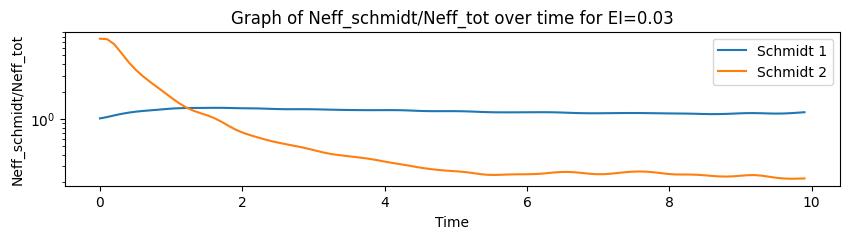

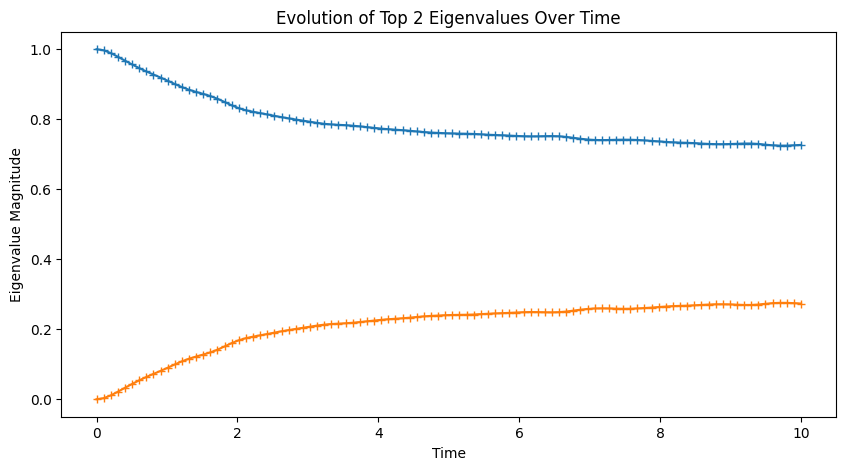

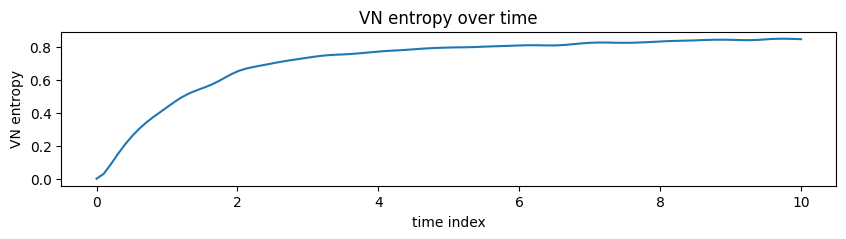

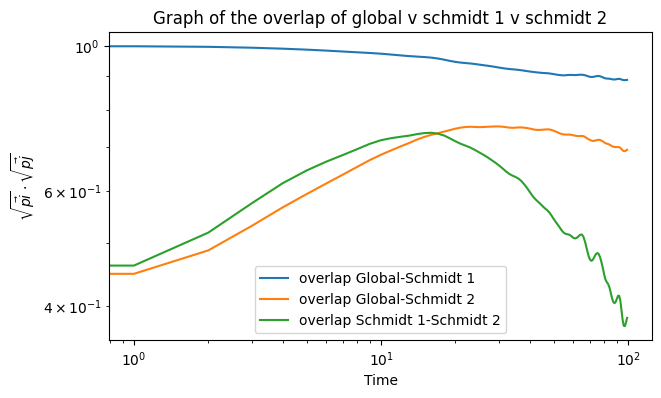

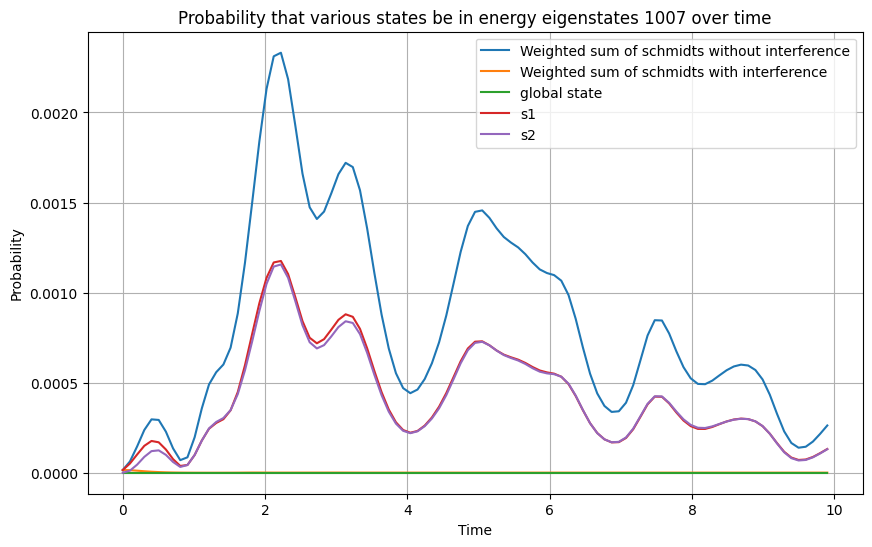

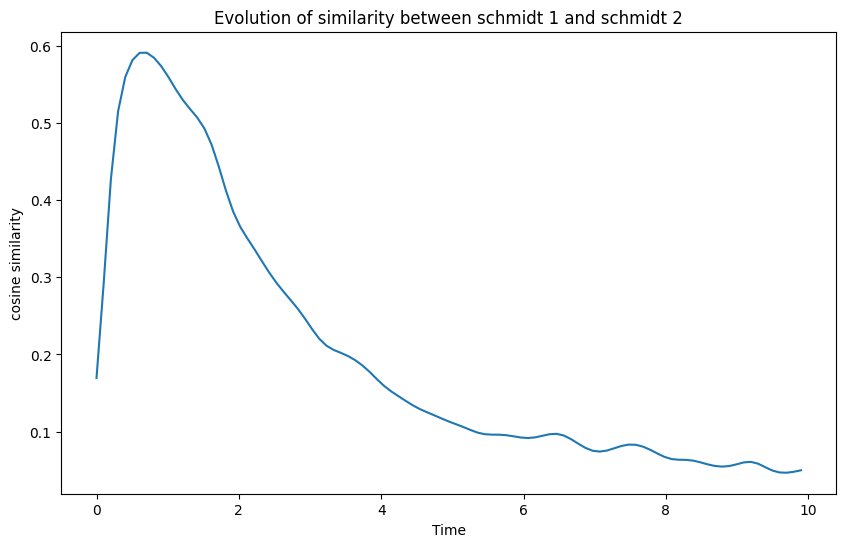

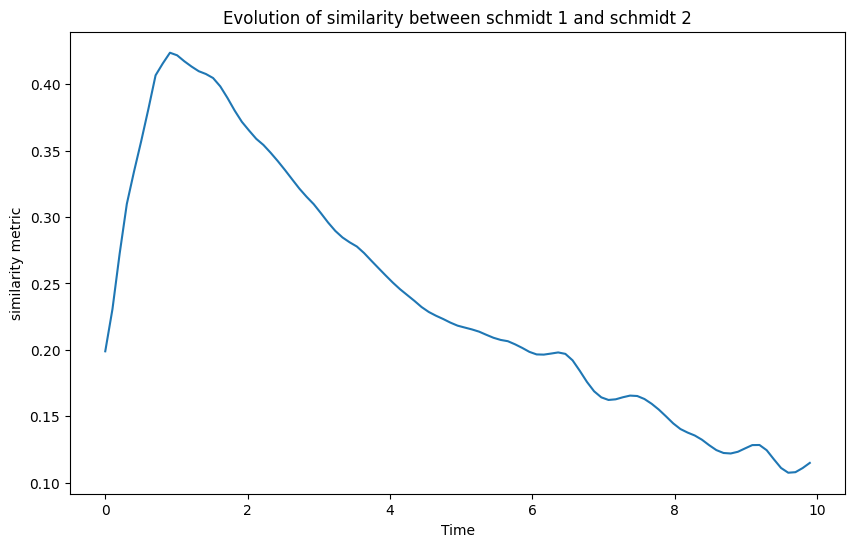

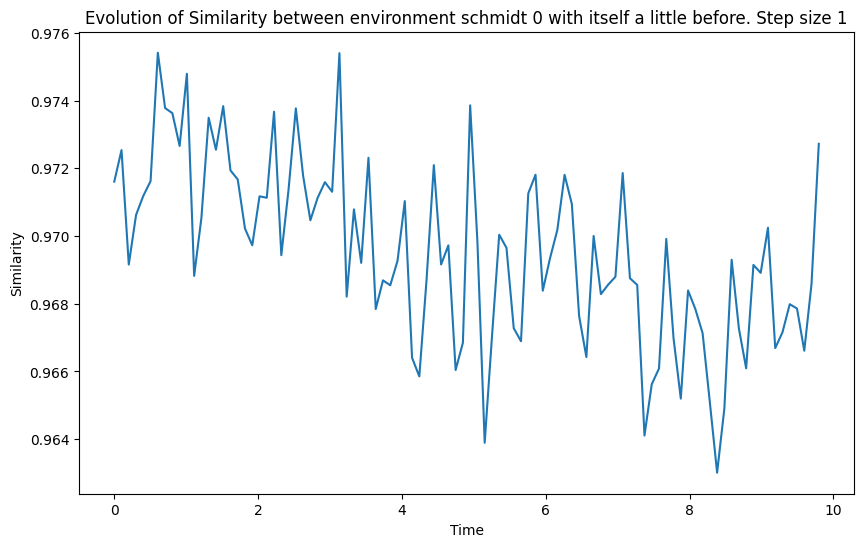

In [9]:
d1, d2 = 10, 200
E_spacing = 1.0
Int_strength = 0.03
EI=Int_strength
tmax= 10
ind_nb = 100
w=0.3
env = [75,150]
all_at_once(d1,d2,E_spacing, Int_strength,tmax,ind_nb,w,env)


We see the global state and schmidt states distribution not match at all. How do we explain that? Interferences? Doesn't look like it...

Note: I dont think we should expect starting in a superposition of environment eigenstates to change much, since after a short time, thats what we get if we start in an environment eigenstate.


[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195]


Neff_total is 152.1225740600244


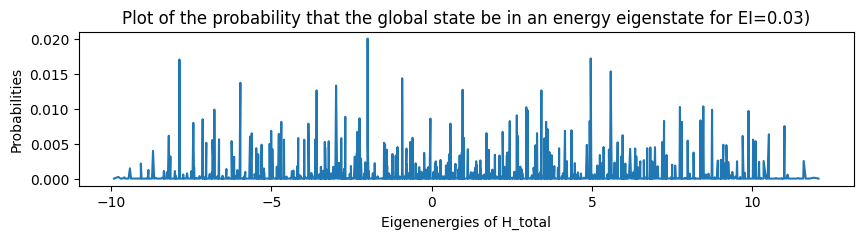

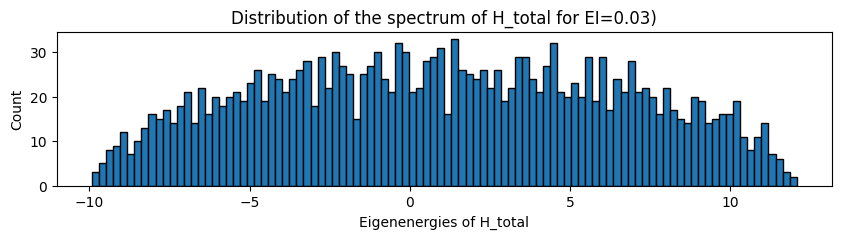

/Users/maringirard/Dev/Quantum_Branching/VN.py:8: RuntimeWarning: divide by zero encountered in log2
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/Users/maringirard/Dev/Quantum_Branching/VN.py:8: RuntimeWarning: invalid value encountered in multiply
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/Users/maringirard/Dev/Quantum_Branching/Quantum_Branching/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/maringirard/Dev/Quantum_Branching/Quantum_Branching/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010


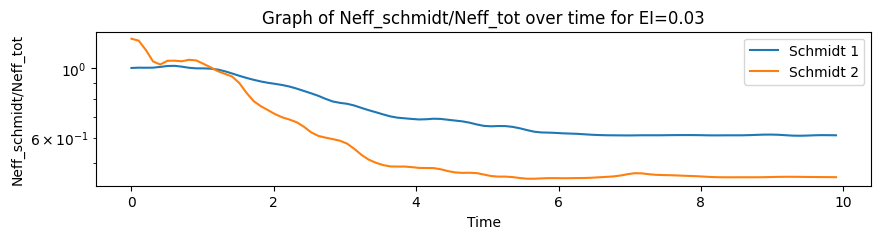

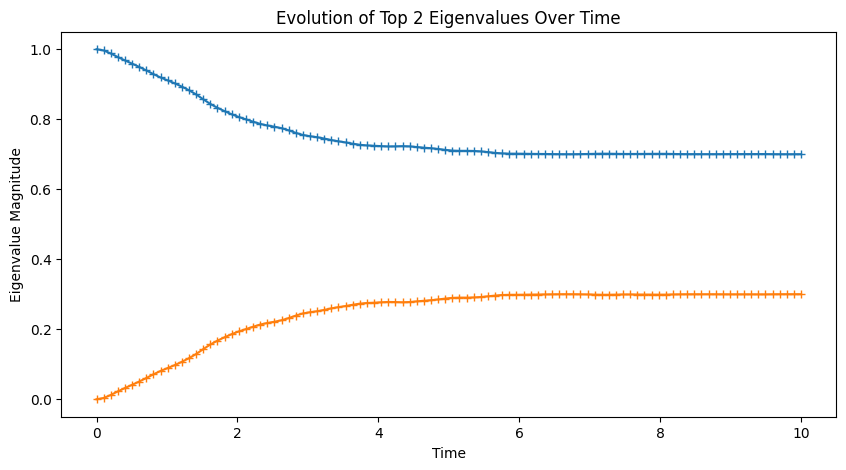

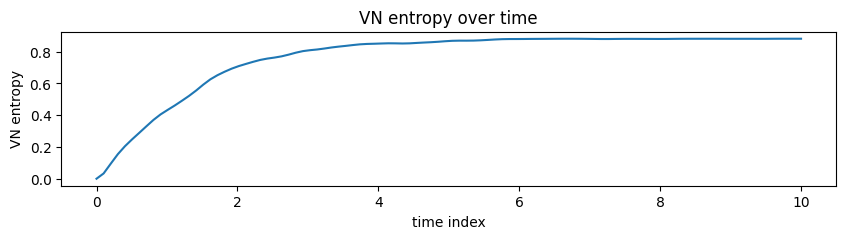

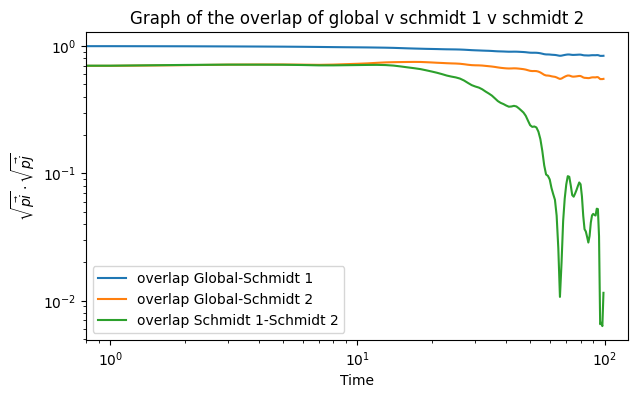

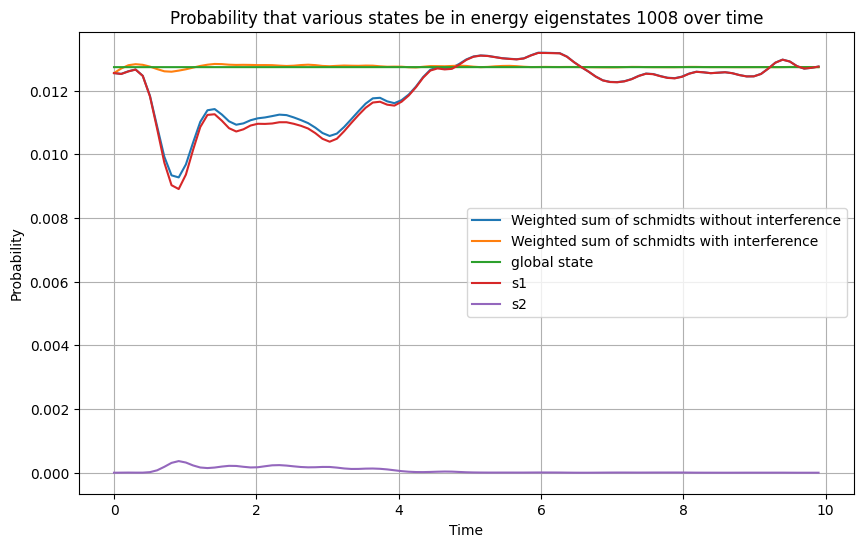

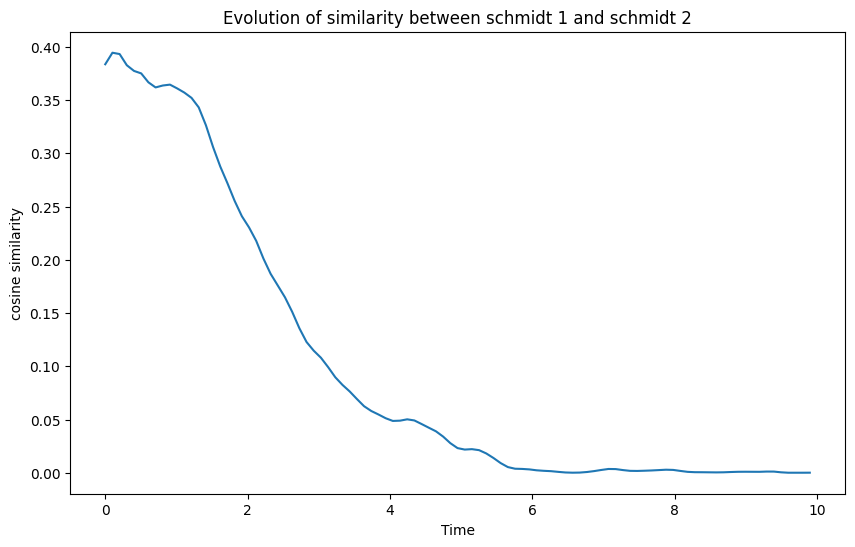

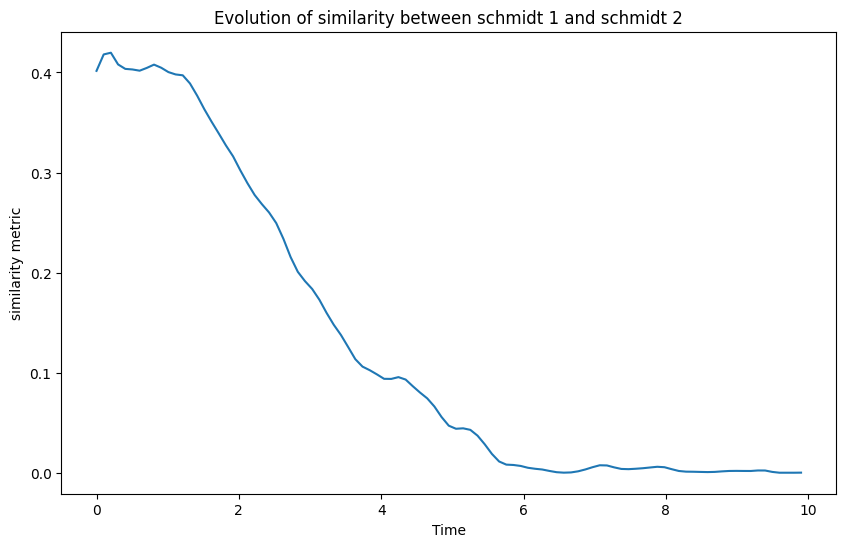

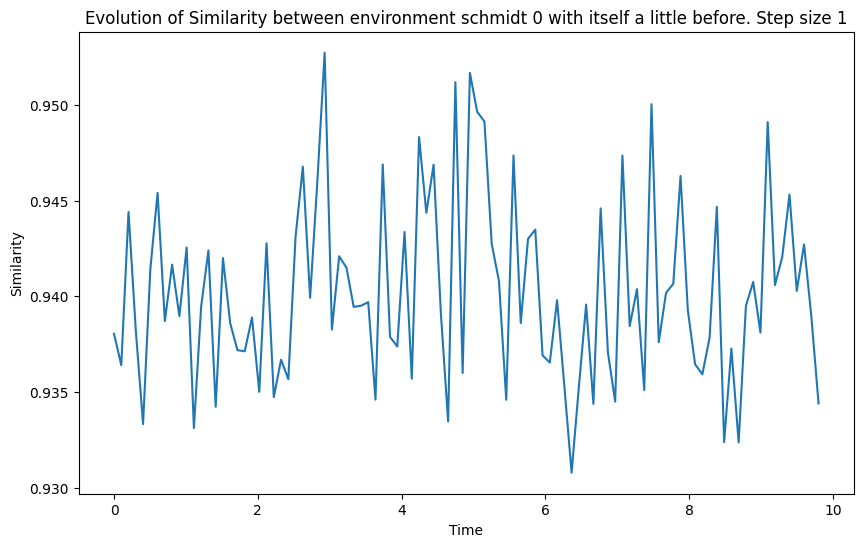

In [10]:
d1, d2 = 10, 200
E_spacing = 1.0
Int_strength = 0.03
EI=Int_strength
tmax= 10
ind_nb = 100
w=0.3
env = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180,185,190,195]
all_at_once(d1,d2,E_spacing, Int_strength,tmax,ind_nb,w,env)


Only thing I can note is the fact that the temporal similarity is gone.

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195]


Neff_total is 160.5051911186184


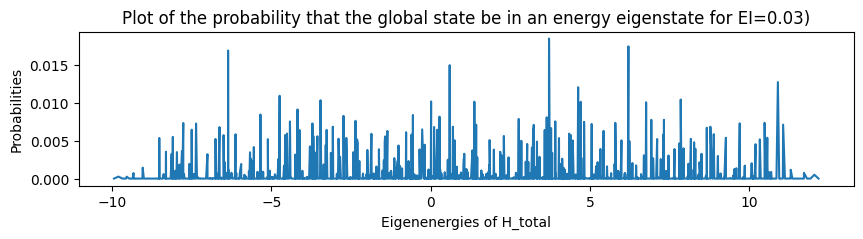

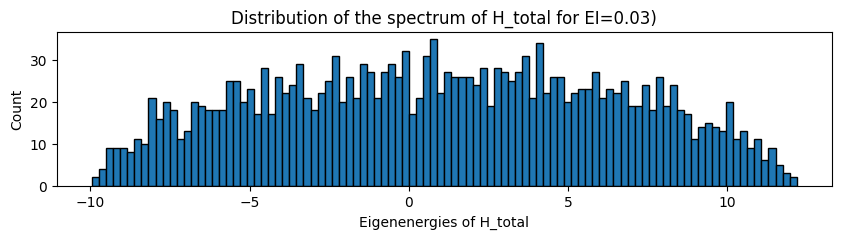

/Users/maringirard/Dev/Quantum_Branching/VN.py:8: RuntimeWarning: divide by zero encountered in log2
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/Users/maringirard/Dev/Quantum_Branching/VN.py:8: RuntimeWarning: invalid value encountered in multiply
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/Users/maringirard/Dev/Quantum_Branching/Quantum_Branching/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/maringirard/Dev/Quantum_Branching/Quantum_Branching/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010


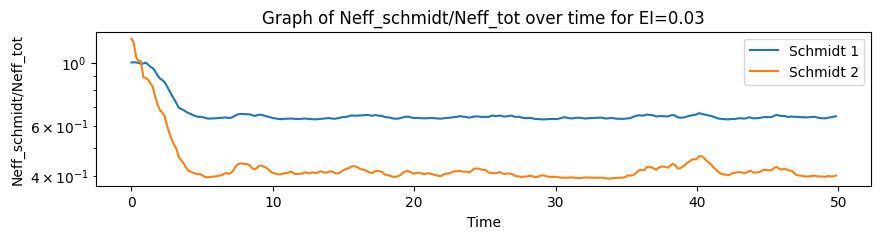

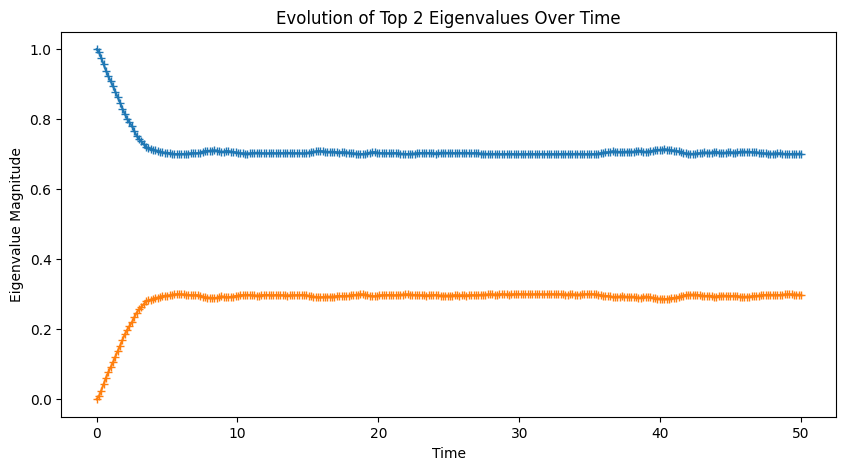

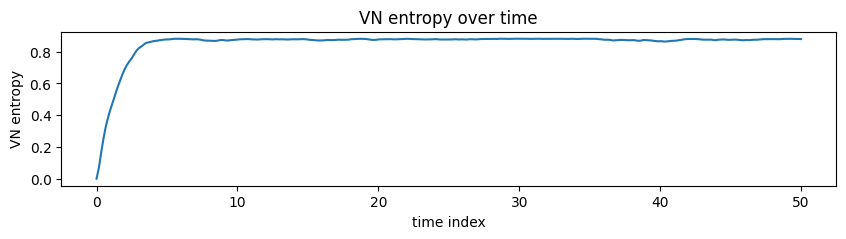

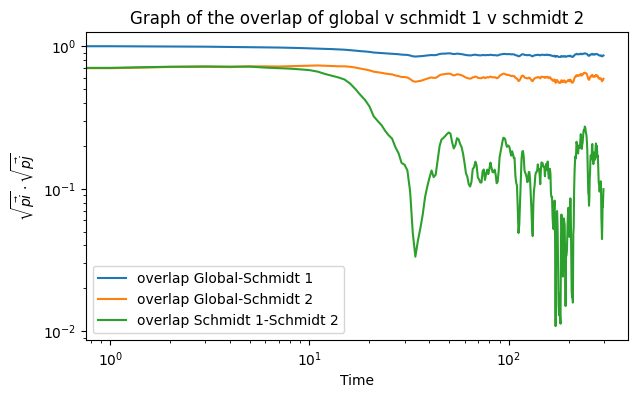

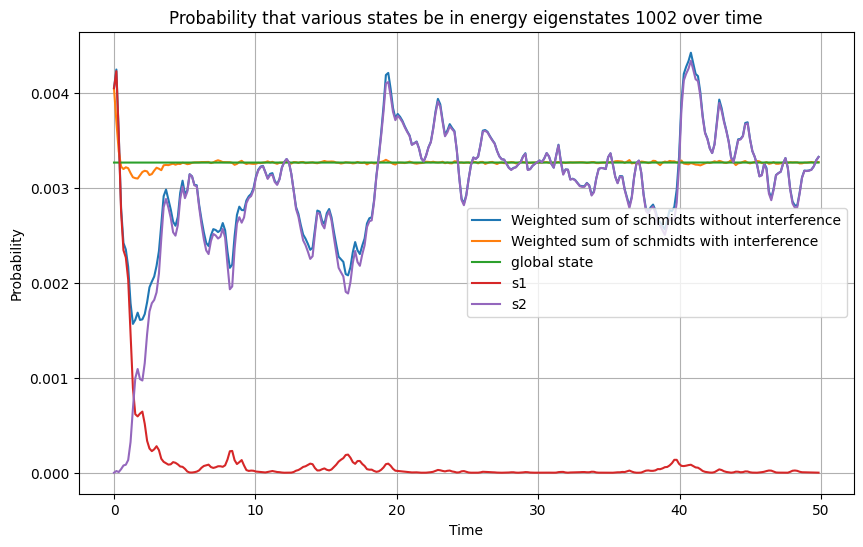

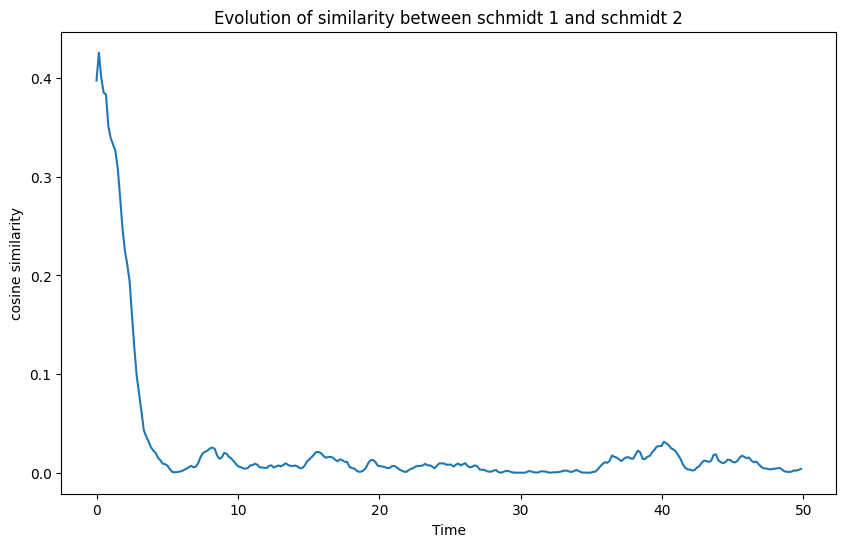

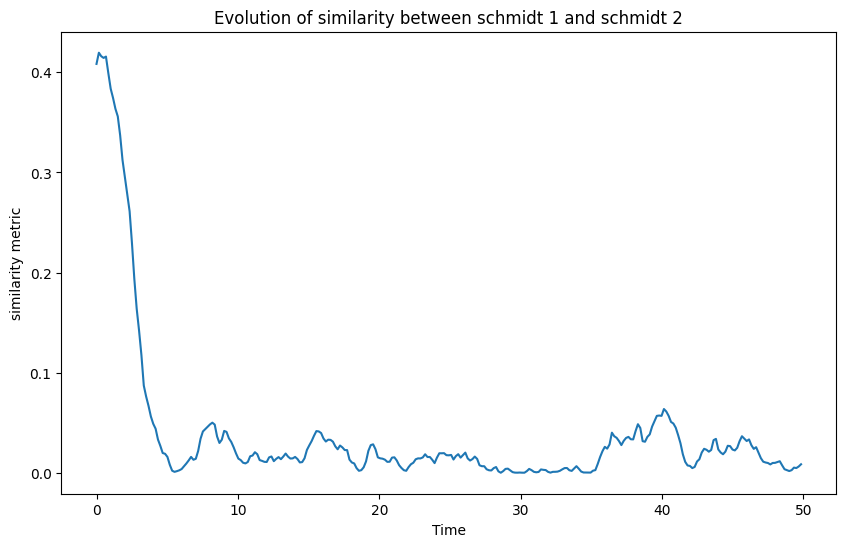

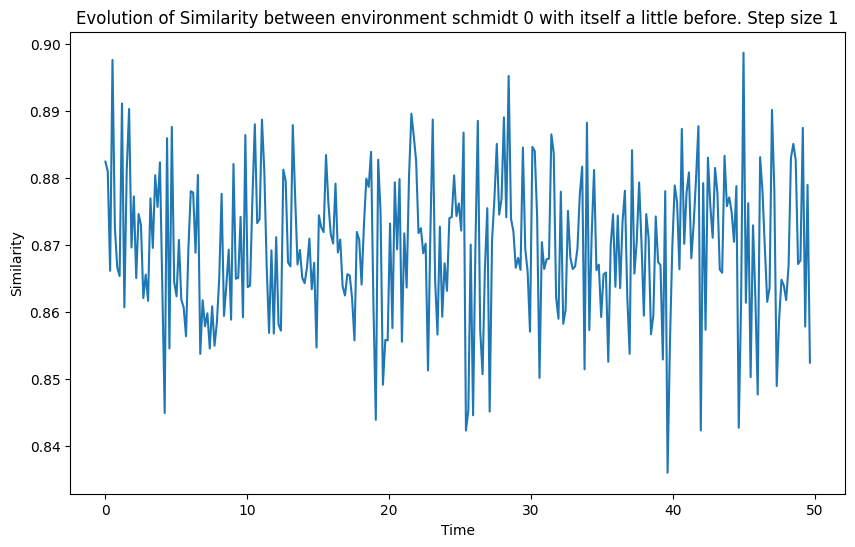

In [11]:
d1, d2 = 10, 200
E_spacing = 1.0
Int_strength = 0.03
EI=Int_strength
tmax= 50
ind_nb = 300
w=0.3
env = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180,185,190,195]
all_at_once(d1,d2,E_spacing, Int_strength,tmax,ind_nb,w,env)